In [ ]:
import pandas as pd


df = pd.read_parquet('yellow_tripdata_2023-01.parquet')


df.to_csv('yellow_tripdata_2023-01.csv', index=True)

1. **What is the average trip distance?**


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt


import pymysql


connection = pymysql.connect(host='localhost', user='root', password='root', database='nyc_taxi_data')

try:
    with connection.cursor() as cursor:
       
        cursor.execute("SELECT trip_distance FROM nyctaxidata")
        
        
        result = cursor.fetchall()
        
        df = pd.DataFrame(result, columns=['trip_distance'])
        
        average_distance = df['trip_distance'].mean()
        
        print(f"Average trip distance: {average_distance}")


        
        
finally:
    connection.close()      
    

ModuleNotFoundError: No module named 'pymysql'

2. **What is the relationship between trip distance and fare amount?**
    - create a scatter plot with `trip_distance` on the x-axis and `fare_amount` on the y-axis to visualize the relationship between these two variables.






#### There is a positive correlation between trip distance and fare amount. Generally as trip distance increases the fare amount also increases.

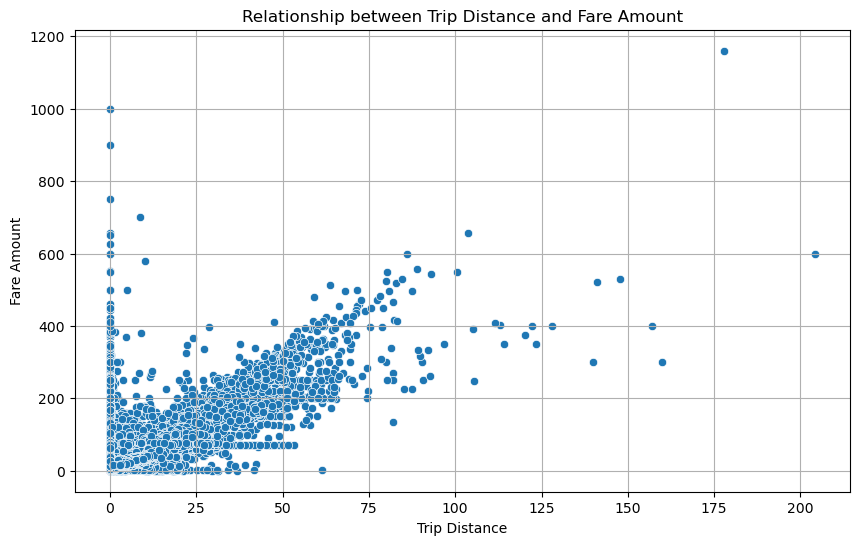

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt


import pymysql


connection = pymysql.connect(host='localhost', user='root', password='root', database='nyc_taxi_data')

try:
    with connection.cursor() as cursor:
       
        cursor.execute("SELECT trip_distance, fare_amount from nyctaxidata WHERE trip_distance <= 400 AND fare_amount > 0")
        
        
        result = cursor.fetchall()
        
       
        df = pd.DataFrame(result, columns=['trip_distance', 'fare_amount'])
        
        
        plt.figure(figsize=(10, 6))
        sb.scatterplot(x='trip_distance', y='fare_amount', data=df)
        plt.title('Relationship between Trip Distance and Fare Amount')
        plt.xlabel('Trip Distance')
        plt.ylabel('Fare Amount')
        plt.grid(True)
        plt.show()
        
        
        
finally:
    connection.close()


3. **What are the busiest hours for taxi trips?**
    - extract the hour from the `tpep_pickup_datetime` column, you can find out during which hours of the day taxi trips are most frequent.
    
    

#### The busiest hours are 17 and 18 hours

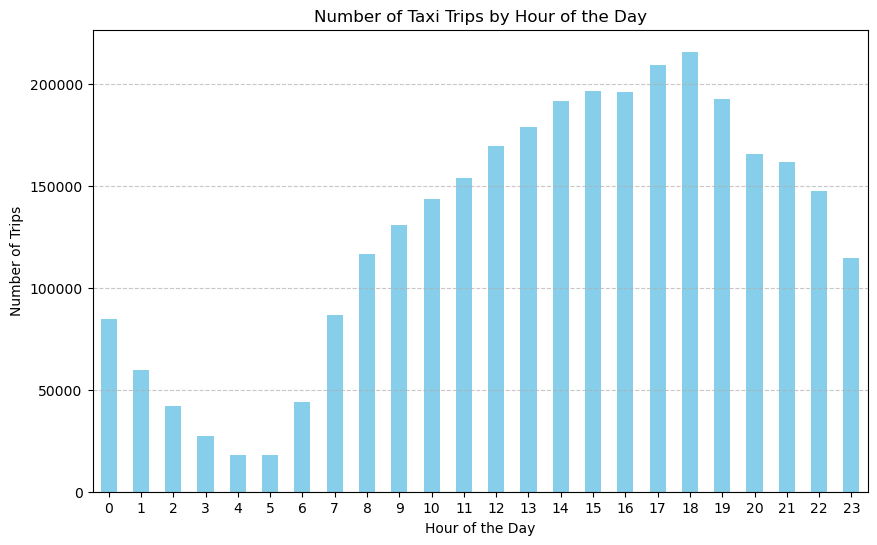

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql


connection = pymysql.connect(host='localhost', user='root', password='root', database='nyc_taxi_data')




try:
    with connection.cursor() as cursor:
       
        cursor.execute("SELECT tpep_pickup_datetime from nyctaxidata")
        
        
        result = cursor.fetchall()
        
        
        
        df = pd.DataFrame(result, columns=['tpep_pickup_datetime'])

        
        df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

        
        count_hour = df['pickup_hour'].value_counts().sort_index()

        
        plt.figure(figsize=(10, 6))
        count_hour.plot(kind='bar', color='skyblue')
        plt.title('Number of Taxi Trips by Hour of the Day')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Trips')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()



finally:
    connection.close()


4. **What is the distribution of total fare amounts?**
    - create a histogram of the `total_amount` column to visualize the distribution of total fare amounts. 

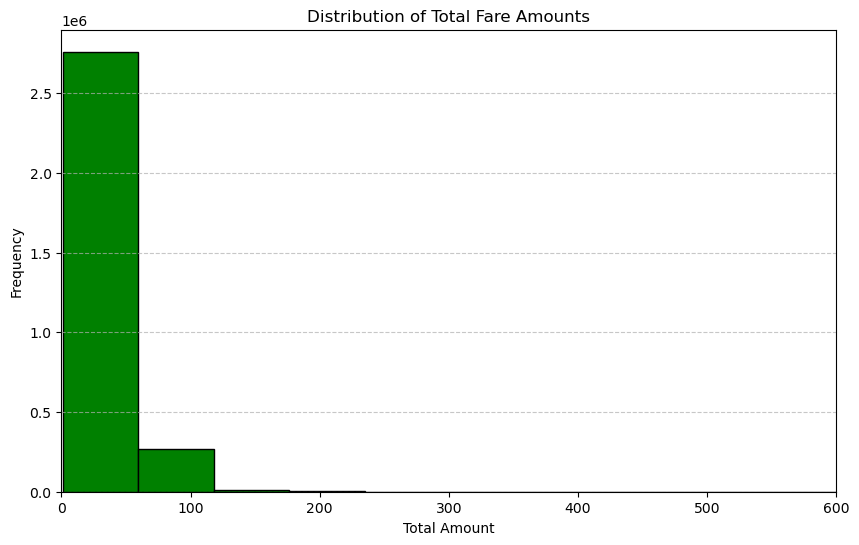

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql


connection = pymysql.connect(host='localhost', user='root', password='root', database='nyc_taxi_data')




try:
    with connection.cursor() as cursor:
       
        cursor.execute("SELECT total_amount from nyctaxidata WHERE fare_amount > 0")
        
        
        result = cursor.fetchall()
        
        
        
        df = pd.DataFrame(result, columns=['total_amount'])

        plt.figure(figsize=(10, 6))
        plt.hist(df['total_amount'], bins=20, color='green', edgecolor='black')
        plt.title('Distribution of Total Fare Amounts')
        plt.xlabel('Total Amount')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xlim(0,600)
        plt.show()



finally:
    connection.close()


5. **What is the average trip duration?**
    - create an attribute total_duration with the difference between `tpep_dropoff_datetime` and `tpep_pickup_datetime` to get the duration of each trip, and then calculate the average trip duration. This could give you an idea of how long a typical taxi trip lasts.


In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt


import pymysql


connection = pymysql.connect(host='localhost', user='root', password='root', database='nyc_taxi_data')

try:
    with connection.cursor() as cursor:
       
        cursor.execute("SELECT tpep_dropoff_datetime, tpep_pickup_datetime from nyctaxidata")
        
        
        result = cursor.fetchall()
        
       
        df = pd.DataFrame(result, columns=['tpep_dropoff_datetime', 'tpep_pickup_datetime'])
        
        
        
        
        df['total_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

    
        average_duration = df['total_duration'].mean()
        
        print(f"Average trip duration: {average_duration}")


       
        
        
        
finally:
    connection.close()

Average trip duration: 15.668998216904992
